2021-06-03
머신러닝 강의1

In [53]:
# import

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [16]:
np.random.seed(1234)

# fish length(domi/bing) features
domi_length = np.random.normal(loc = 100, scale = 10, size = 50)
bing_length = np.random.normal(loc = 80, scale = 10, size = 30)
# 정규분포에서 각각의 인자의 의미?
# 정규분포를 따르는걸 랜덤으로 만든다는것.
# loc : location. 평균
# scale : variance. 얼마나 퍼져있는지
# size : 크기

# print(domi_length)
# print(np.shape(domi_length))


# fish_weight(domi/bing) features
domi_weight = np.random.normal(loc = 400, scale = 100, size = 50)
bing_weight = np.random.normal(loc = 100, scale = 100, size = 30)

In [17]:
# target
domi_target = np.ones(50)
bing_target = np.zeros(30)

# print(domi_target)

In [35]:
# 1d -> 2d

# data
fish_length = np.append(domi_length, bing_length)
fish_weight = np.append(domi_weight, bing_weight)
# 자료형이 ndarray라서 +로 연결불가

# target
fish_target = np.append(domi_target, bing_target)

# print(np.shape(fish_length))
# print(np.shape(fish_target))


# sd
fish_data = np.column_stack((fish_length, fish_weight))

# print(np.shape(fish_data))

(80, 2)


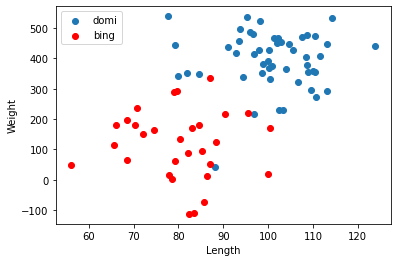

In [23]:
plt.scatter(domi_length, domi_weight, label = "domi")
plt.scatter(bing_length, bing_weight, label = "bing", c = "r")
# color red
plt.xlabel("Length")
plt.ylabel("Weight")
plt.legend()
plt.show()

In [39]:
# data splitting

# default test = 0.25
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify = fish_target, random_state = 1234)
# 에이스 메트릭스화 하는게 스트라티파이. 샘플링 계층화
# 편향 줄여줌

# print(np.shape(train_input))
# print(np.shape(test_input))

(60, 2)
(20, 2)


In [50]:
# z-scoring, Feature engineering
# sclaing

# train의 mean
fish_mean = np.mean(train_input, axis = 0)
fish_std = np.std(train_input, axis = 0)
# print("axis = 0, mean = ", fish_mean)

train_scaled = (train_input - fish_mean)/fish_std
# print(train_scaled)


# test scaling
# 트레이닝에서 구한걸로 테스트 스케일
test_scaled = (test_input - fish_mean)/fish_std

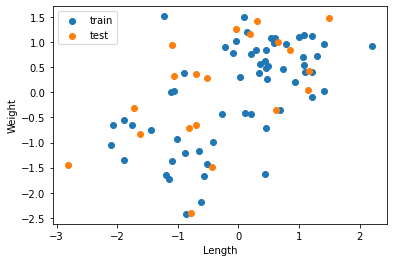

In [52]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1], label = "train")
plt.scatter(test_scaled[:, 0], test_scaled[:, 1], label = "test")
# color red
plt.xlabel("Length")
plt.ylabel("Weight")
plt.legend()
plt.show()

In [54]:
# KNN
kn = KNeighborsClassifier()

# Learning
kn.fit(train_scaled, train_target)

# accuracy
kn.score(test_scaled, test_target)

0.9